In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from glob import glob
import ast
import os

df_list = []
for filename in glob("../stance_results/*.csv"):
    print(os.path.basename(filename)[:-4])
    df = pd.read_csv(filename)
    df['drug_name'] = os.path.basename(filename)[:-4]
    df_list.append(df)
    
df_tweets = pd.concat(df_list)
print(df_tweets.shape)
df_tweets.head()

ivermectin
hcq
molnupiravir
remdesivir
(499246, 5)


,Unnamed: 0,screen_name,stance,med,drug_name
0,0,carmenpaun,-1,False,ivermectin
1,1,DavidStevenson1,-1,False,ivermectin
2,2,kccummins2,-1,False,ivermectin
3,3,HealthyEarth8,1,False,ivermectin
4,6,drjohnhaiti,1,False,ivermectin


In [3]:
import json

all_rows = []
with open("../m3inference/coviddrug/text_user_demographic.jsonl") as f:
    for line in f:
        jsonobj = json.loads(line)
        for user_id, user_info in jsonobj.items():
            # print(user_id)
            all_rows.append([user_id, user_info['gender'], user_info['org'], user_info['age']])

with open("../m3inference/coviddrug/image_user_demographic.jsonl") as f:
    for line in f:
        jsonobj = json.loads(line)
        for user_id, user_info in jsonobj.items():
            # print(user_id)
            all_rows.append([user_id, user_info['gender'], user_info['org'], user_info['age']])

df_m3_results = pd.DataFrame(all_rows, columns=["twitter_id", "gender", "org", "age"])
print(df_m3_results.shape)
df_m3_results.head()

(97369, 4)


,twitter_id,gender,org,age
0,1217520455013130240,"{'male': 0.9595, 'female': 0.0405}","{'non-org': 0.1711, 'is-org': 0.8289}","{'<=18': 0.2055, '19-29': 0.0359, '30-39': 0.2..."
1,1365405065834598400,"{'male': 0.0052, 'female': 0.9948}","{'non-org': 0.7157, 'is-org': 0.2843}","{'<=18': 0.0465, '19-29': 0.0185, '30-39': 0.6..."
2,745409481404649473,"{'male': 0.7753, 'female': 0.2247}","{'non-org': 0.231, 'is-org': 0.769}","{'<=18': 0.3393, '19-29': 0.0677, '30-39': 0.4..."
3,1322568743495569408,"{'male': 0.9676, 'female': 0.0324}","{'non-org': 0.9823, 'is-org': 0.0177}","{'<=18': 0.1197, '19-29': 0.6997, '30-39': 0.1..."
4,49922681,"{'male': 0.8516, 'female': 0.1484}","{'non-org': 0.5433, 'is-org': 0.4567}","{'<=18': 0.0116, '19-29': 0.013, '30-39': 0.26..."


In [4]:
df_users = pd.read_csv("../all_users_info.csv")
df_users.user_id = df_users.user_id.astype(str)
df_users.head()

,user_id,screen_name,name,description,profile_image_url
0,1274105887926284288,CRoll78,"Kim, WI Nerd in a box of Nerds✝️🇺🇸🇵🇱",Christian w/Jewish ancestry. Conservative Cons...,https://pbs.twimg.com/profile_images/137454645...
1,1217520455013130240,OratorBlog,BLOG-ORATOR,#TheMighty200 An anonymous Patriot who belie...,http://pbs.twimg.com/profile_images/1217548833...
2,268201193,DeccanHerald,Deccan Herald,Bengaluru & Karnataka's leading news daily for...,https://pbs.twimg.com/profile_images/127500460...
3,1347730009084059653,philipM21152135,Philip Moses,"Father, Husband,Mental Health Community Social...",https://pbs.twimg.com/profile_images/134773179...
4,2743433395,raplineTam,GranMochi Its Hobi's Birthday !💜🌈 OT⁷ BLM,61 year old ARMY enjoying my granny glow up c...,https://pbs.twimg.com/profile_images/149269327...


In [5]:
df_politician = pd.read_csv("../political_inference/covid_user_political_follow.csv")
df_politician.twitter_id = df_politician.twitter_id.astype(str)

def assign_party(row):
    if row['dem_count'] == row['rep_count']:
        return "neutral"
    elif row['dem_count'] > row['rep_count']:
        return "left"
    else:
        return "right"

df_politician['political_orientation'] = df_politician.apply(assign_party, axis=1)

df_politician.head()

,twitter_id,dem_count,rep_count,political_orientation
0,108556027,19,2,left
1,907389979042521089,4,0,left
2,44372211,0,0,neutral
3,710162591486611457,0,0,neutral
4,839099917121511425,0,1,right


In [6]:
df_politician.shape

(88124, 4)

In [7]:
print(df_users.shape)
print(df_m3_results.shape)

(97369, 5)
(97369, 4)


In [8]:
df_users_m3 = df_m3_results.merge(df_users, left_on=['twitter_id'], right_on=['user_id'])

df_users_m3_politician = df_users_m3.merge(df_politician, on='twitter_id', how="left")
df_users_m3_politician = df_users_m3_politician[['twitter_id', 'screen_name', 'gender', 'org', 'age', 'political_orientation']]

# df_users_m3_politician = df_users_m3_politician.fillna("none")
df_users_m3_politician.head()

,twitter_id,screen_name,gender,org,age,political_orientation
0,1217520455013130240,OratorBlog,"{'male': 0.9595, 'female': 0.0405}","{'non-org': 0.1711, 'is-org': 0.8289}","{'<=18': 0.2055, '19-29': 0.0359, '30-39': 0.2...",NaN
1,1365405065834598400,midwestmomma2,"{'male': 0.0052, 'female': 0.9948}","{'non-org': 0.7157, 'is-org': 0.2843}","{'<=18': 0.0465, '19-29': 0.0185, '30-39': 0.6...",NaN
2,745409481404649473,Ganjly420,"{'male': 0.7753, 'female': 0.2247}","{'non-org': 0.231, 'is-org': 0.769}","{'<=18': 0.3393, '19-29': 0.0677, '30-39': 0.4...",left
3,1322568743495569408,ThomasHarrigan8,"{'male': 0.9676, 'female': 0.0324}","{'non-org': 0.9823, 'is-org': 0.0177}","{'<=18': 0.1197, '19-29': 0.6997, '30-39': 0.1...",neutral
4,49922681,SafariWoman,"{'male': 0.8516, 'female': 0.1484}","{'non-org': 0.5433, 'is-org': 0.4567}","{'<=18': 0.0116, '19-29': 0.013, '30-39': 0.26...",right


In [9]:
df_users_m3_politician['pred_gender'] = df_users_m3_politician.gender.apply(lambda x: sorted(x.items(), key=lambda y: -y[1])[0][0])
df_users_m3_politician['pred_org'] = df_users_m3_politician.org.apply(lambda x: sorted(x.items(), key=lambda y: -y[1])[0][0])
df_users_m3_politician['pred_age'] = df_users_m3_politician.age.apply(lambda x: sorted(x.items(), key=lambda y: -y[1])[0][0])
df_users_m3_politician = df_users_m3_politician[['twitter_id', 'screen_name', 'pred_gender', 'pred_org', 'pred_age', 'political_orientation']]

# filter out organiation accounts
df_users_m3_politician = df_users_m3_politician[df_users_m3_politician.pred_org == "non-org"]
df_users_m3_politician = df_users_m3_politician[~df_users_m3_politician.political_orientation.isnull()]
df_users_m3_politician


,twitter_id,screen_name,pred_gender,pred_org,pred_age,political_orientation
3,1322568743495569408,ThomasHarrigan8,male,non-org,19-29,neutral
4,49922681,SafariWoman,male,non-org,>=40,right
6,83210801,Dr_Aust_PhD,male,non-org,>=40,neutral
7,2279385774,johnnybgoode678,male,non-org,30-39,right
11,1138890976380899328,MichaelTopolov1,male,non-org,>=40,neutral
...,...,...,...,...,...,...
97363,1244410923361521664,RonJulioMexico,male,non-org,>=40,right
97364,1103143754175864835,sallamyacoub,male,non-org,19-29,left
97366,2609285348,TedEdted01,male,non-org,>=40,neutral
97367,107446844,hoax_wagon,male,non-org,>=40,neutral


In [10]:
df_users_m3_politician.to_csv("users.csv")

In [11]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

# a = (df_users_m3_politician.pred_gender == "male")
# print("male percentage:", a.sum() / a.shape[0])

# p = sns.displot(data=df_users_m3_politician, x='pred_gender', stat='percent', height=3)
# plt.show()


In [12]:
# a = (df_users_m3_politician.pred_org == "non-org")
# print("personal account percentage:", a.sum() / a.shape[0])

# p = sns.displot(data=df_users_m3_politician, x='pred_org', stat='percent', height=3)
# plt.show()


In [13]:
# p = sns.displot(data=df_users_m3_politician, x='pred_age', stat='percent', height=3)
# plt.show()


In [14]:
# p = sns.displot(data=df_users_m3_politician, x='political_orientation', stat='percent', height=3)
# plt.show()


In [15]:
## join users and tweets
df_tweets_users = df_tweets.merge(df_users_m3_politician, on='screen_name', how='left')
df_tweets_users.med = df_tweets_users.med.replace({True: "Med", False: "Non-med"})
df_tweets_users = df_tweets_users[~df_tweets_users.twitter_id.isnull()]
df_tweets_users.shape


(103197, 10)

In [16]:
df_tweets_users.to_csv("users_stance_tweets.csv")

In [17]:
df_tweets_users[['pred_age', 'twitter_id']].groupby('pred_age').count()

float(7318 / (7318 + 6196 + 23160 + 66523))*100

7.091291413510083

In [18]:
df_tweets_users.pred_age = df_tweets_users.pred_age.map({"19-29": "19-39", "30-39": "19-39", "<=18": "<=18", ">=40": ">=40"})
df_tweets_users[['pred_age', 'twitter_id']].groupby('pred_age').count()*100 / 103197


,twitter_id
pred_age,
19-39,28.446563
<=18,7.091291
>=40,64.462145


In [19]:
df_tweets_users[['pred_gender', 'twitter_id']].groupby('pred_gender').count()*100 / 103197


,twitter_id
pred_gender,
female,28.175238
male,71.824762


In [20]:
df_tweets_users[['political_orientation', 'twitter_id']].groupby('political_orientation').count()*100 / 103197


,twitter_id
political_orientation,
left,45.459655
neutral,16.281481
right,38.258864


In [21]:
df_tweets_users[['med', 'twitter_id']].groupby('med').count()*100 / 103197


,twitter_id
med,
Med,9.014797
Non-med,90.985203


In [22]:
df_tweets_users.pred_age.unique()

array(['>=40', '19-39', '<=18'], dtype=object)

In [23]:
import scipy.stats as stats
from scipy.stats import chi2_contingency
from collections import Counter

def get_sorted_values(group_list):
    sorted_items = sorted(Counter(group_list).items(), key=lambda x: x[0])
    print(sorted_items)
    return [a[1] for a in sorted_items]


for drug_name in ["hcq", 'ivermectin', "molnupiravir", "remdesivir"]:
    df_ = df_tweets_users[df_tweets_users.drug_name == drug_name]
    group1 = df_[df_.pred_gender == "male"].stance.values
    group2 = df_[df_.pred_gender == "female"].stance.values
#     print(drug_name, att1, att2, stats.ttest_ind(a=group1, b=group2, equal_var=True))
    
    group1 = get_sorted_values(group1)
    group2 = get_sorted_values(group2)
    
    chi2, p, dof, ex = chi2_contingency([group1, group2], correction=False)
    print(drug_name, chi2, p, dof)


[(-1, 9105), (0, 3553), (1, 9119)]
[(-1, 3365), (0, 1162), (1, 4022)]
hcq 76.12963322416287 2.942118702203882e-17 2
[(-1, 9399), (0, 6652), (1, 15169)]
[(-1, 3526), (0, 2831), (1, 5657)]
ivermectin 25.871346440668418 2.4105075756506146e-06 2
[(-1, 475), (0, 932), (1, 1016)]
[(-1, 240), (0, 369), (1, 470)]
molnupiravir 6.670270211250839 0.03560977480545904 2
[(-1, 4937), (0, 5212), (1, 8552)]
[(-1, 2267), (0, 2153), (1, 3014)]
remdesivir 66.95135675695406 2.895326879611074e-15 2


In [24]:
# compare the youngest and oldest group
for drug_name in ["hcq", 'ivermectin', "molnupiravir", "remdesivir"]:
    df_ = df_tweets_users[df_tweets_users.drug_name == drug_name]
    group1 = df_[df_.pred_age == ">=40"].stance.values
    group2 = df_[df_.pred_age == "<=18"].stance.values
#     print(drug_name, att1, att2, stats.ttest_ind(a=group1, b=group2, equal_var=True))
    
    group1 = get_sorted_values(group1)
    group2 = get_sorted_values(group2)
    
    chi2, p, dof, ex = chi2_contingency([group1, group2], correction=False)
    print(drug_name, chi2, p, dof)


[(-1, 8440), (0, 3428), (1, 9394)]
[(-1, 721), (0, 223), (1, 850)]
hcq 18.1535110764758 0.0001142918220047727 2
[(-1, 8147), (0, 6061), (1, 13289)]
[(-1, 1092), (0, 562), (1, 1311)]
ivermectin 66.9430700889381 2.9073480726470083e-15 2
[(-1, 416), (0, 818), (1, 917)]
[(-1, 90), (0, 101), (1, 117)]
molnupiravir 16.142008613201405 0.0003124693084407272 2
[(-1, 4260), (0, 4324), (1, 7029)]
[(-1, 567), (0, 530), (1, 1154)]
remdesivir 32.42250186848341 9.110520181628047e-08 2


In [25]:
# compare the left and right group
for drug_name in ["hcq", 'ivermectin', "molnupiravir", "remdesivir"]:
    df_ = df_tweets_users[df_tweets_users.drug_name == drug_name]
    group1 = df_[df_.political_orientation == "left"].stance.values
    group2 = df_[df_.political_orientation == "right"].stance.values
#     print(drug_name, att1, att2, stats.ttest_ind(a=group1, b=group2, equal_var=True))
    
    group1 = get_sorted_values(group1)
    group2 = get_sorted_values(group2)
    
    chi2, p, dof, ex = chi2_contingency([group1, group2], correction=False)
    print(drug_name, chi2, p, dof)


[(-1, 8529), (0, 1969), (1, 1967)]
[(-1, 2267), (0, 1747), (1, 9681)]
hcq 8715.51396731388 0.0 2
[(-1, 8541), (0, 3950), (1, 6244)]
[(-1, 2557), (0, 3822), (1, 10867)]
ivermectin 4423.643575744881 0.0 2
[(-1, 339), (0, 761), (1, 873)]
[(-1, 204), (0, 259), (1, 318)]
molnupiravir 28.703312474591428 5.849986851664997e-07 2
[(-1, 4395), (0, 4144), (1, 5201)]
[(-1, 1815), (0, 1567), (1, 4378)]
remdesivir 695.9938202493051 7.3597356166324605e-152 2


In [26]:
# compare the left and right group
for drug_name in ["hcq", 'ivermectin', "molnupiravir", "remdesivir"]:
    df_ = df_tweets_users[df_tweets_users.drug_name == drug_name]
    group1 = df_[df_.med == "Med"].stance.values
    group2 = df_[df_.med == "Non-med"].stance.values
#     print(drug_name, att1, att2, stats.ttest_ind(a=group1, b=group2, equal_var=True))
    
    group1 = get_sorted_values(group1)
    group2 = get_sorted_values(group2)
    
    chi2, p, dof, ex = chi2_contingency([group1, group2], correction=False)
    print(drug_name, chi2, p, dof)


[(-1, 1151), (0, 410), (1, 827)]
[(-1, 11319), (0, 4305), (1, 12314)]
hcq 81.26475247552303 2.257268459698621e-18 2
[(-1, 1548), (0, 1226), (1, 1560)]
[(-1, 11377), (0, 8257), (1, 19266)]
ivermectin 291.5225502397198 4.973733830365079e-64 2
[(-1, 61), (0, 109), (1, 165)]
[(-1, 654), (0, 1192), (1, 1321)]
molnupiravir 7.067762024911033 0.029191403537414763 2
[(-1, 608), (0, 712), (1, 926)]
[(-1, 6596), (0, 6653), (1, 10640)]
remdesivir 16.10658744533417 0.00031805261825320084 2


In [27]:
from itertools import combinations

# age_comb = list(combinations(['>=40', '30-39', '<=18', '19-29'], 2))

# for drug_name in ["hcq", 'ivermectin', "molnupiravir", "remdesivir"]:
#     for att1, att2 in age_comb:
#         df_ = df_tweets_users[df_tweets_users.drug_name == drug_name]
#         group1 = df_[df_.pred_age == att1].stance.values
#         group2 = df_[df_.pred_age == att2].stance.values
#         print(drug_name, att1, att2, stats.ttest_ind(a=group1, b=group2, equal_var=True))

import numpy as np
import pandas as pd
import scipy.stats as stats

from statsmodels.miscmodels.ordinal_model import OrderedModel

for drug_name in ["hcq", 'ivermectin', "molnupiravir", "remdesivir"]:
    print(drug_name)
    df_ = df_tweets_users[df_tweets_users.drug_name == drug_name]
    print(df_.shape)

hcq
(30326, 10)
ivermectin
(43234, 10)
molnupiravir
(3502, 10)
remdesivir
(26135, 10)


In [28]:
# ! pip install statsmodels

df_

In [29]:
df_tweets_users[['political_orientation', 'twitter_id']].groupby('political_orientation').count()

100 * (50990 / (63044 + 28164 + 50990))

35.858450892417615

In [30]:
(df_tweets_users[~df_tweets_users.pred_age.isnull()]).shape[0] / df_tweets_users.shape[0]

1.0

In [31]:
df_tweets_users[~df_tweets_users.pred_age.isnull()]

,Unnamed: 0,screen_name,stance,med,drug_name,twitter_id,pred_gender,pred_org,pred_age,political_orientation
2,2,kccummins2,-1,Non-med,ivermectin,2995221188,female,non-org,>=40,right
5,7,FuruKyouka,1,Non-med,ivermectin,3876322150,male,non-org,19-39,neutral
21,26,kccummins2,1,Non-med,ivermectin,2995221188,female,non-org,>=40,right
26,31,HPT30147483,1,Non-med,ivermectin,1258378220090658816,male,non-org,>=40,right
29,35,AlietaEck,1,Med,ivermectin,440499185,female,non-org,>=40,right
...,...,...,...,...,...,...,...,...,...,...
499238,45457,SportTheory101,0,Non-med,remdesivir,1080265457175674880,male,non-org,>=40,right
499240,45459,Rick_Kean,0,Non-med,remdesivir,159610337,male,non-org,<=18,right
499242,45461,ButifldrmLori,0,Non-med,remdesivir,1442588970,female,non-org,>=40,right
499243,45462,AlDubest2Evry1,1,Non-med,remdesivir,3685052935,female,non-org,19-39,right


In [32]:
(df_tweets_users.pred_gender.dropna()).shape[0] / df_tweets_users.shape[0]

1.0

In [33]:
(df_tweets_users.pred_org.dropna()).shape[0] / df_tweets_users.shape[0]

1.0

In [34]:
(df_tweets_users.pred_org.dropna()).shape[0] / df_tweets_users.shape[0]

1.0

In [35]:
df_tweets_users.drug_name.unique()

array(['ivermectin', 'hcq', 'molnupiravir', 'remdesivir'], dtype=object)

In [36]:
# df_.groupby(attribute_name).count()['screen_name'] / df_[~df_[attribute_name].isnull()].shape[0]

In [37]:
def plot_dist(df_tweets_users, attribute_name, drug_name):
    for stance in [-1, 0, 1]:
        df_ = df_tweets_users[df_tweets_users.stance == stance]
        df_ = df_[df_.drug_name == drug_name]
        print(df_.groupby(attribute_name).count()['screen_name'] / df_[~df_[attribute_name].isnull()].shape[0])
        p = sns.displot(data=df_.sort_values(by=attribute_name, ascending=False), x=attribute_name, stat='percent', height=3, )
        plt.title(label="stance {}".format(stance))
        plt.show()

## Gender

In [39]:
df_tweets_users

,Unnamed: 0,screen_name,stance,med,drug_name,twitter_id,pred_gender,pred_org,pred_age,political_orientation
2,2,kccummins2,-1,Non-med,ivermectin,2995221188,female,non-org,>=40,right
5,7,FuruKyouka,1,Non-med,ivermectin,3876322150,male,non-org,19-39,neutral
21,26,kccummins2,1,Non-med,ivermectin,2995221188,female,non-org,>=40,right
26,31,HPT30147483,1,Non-med,ivermectin,1258378220090658816,male,non-org,>=40,right
29,35,AlietaEck,1,Med,ivermectin,440499185,female,non-org,>=40,right
...,...,...,...,...,...,...,...,...,...,...
499238,45457,SportTheory101,0,Non-med,remdesivir,1080265457175674880,male,non-org,>=40,right
499240,45459,Rick_Kean,0,Non-med,remdesivir,159610337,male,non-org,<=18,right
499242,45461,ButifldrmLori,0,Non-med,remdesivir,1442588970,female,non-org,>=40,right
499243,45462,AlDubest2Evry1,1,Non-med,remdesivir,3685052935,female,non-org,19-39,right


In [84]:
attribute_name = "pred_gender"

a_count = df_tweets_users.groupby(["drug_name", "pred_gender", "stance"])[['screen_name']].count()

a_sum = a_count.reset_index()
a_sum.stance = a_sum.stance.astype("str")
a_sum = a_sum.groupby(["drug_name", "pred_gender"]).sum()

df_tmp = (a_count / a_sum).reset_index()

In [85]:
a_count.reset_index().to_csv("gender_stance_plot.csv")

In [86]:
df_tmp

,drug_name,pred_gender,stance,screen_name
0,hcq,female,-1,0.393613
1,hcq,female,0,0.135922
2,hcq,female,1,0.470464
3,hcq,male,-1,0.418102
4,hcq,male,0,0.163154
5,hcq,male,1,0.418745
6,ivermectin,female,-1,0.293491
7,ivermectin,female,0,0.235642
8,ivermectin,female,1,0.470867
9,ivermectin,male,-1,0.301057


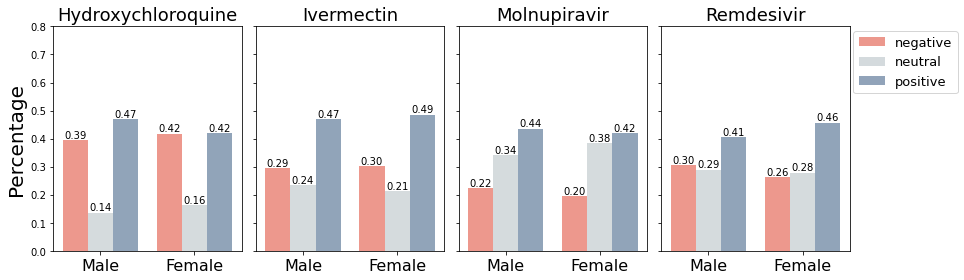

In [78]:
drug2realname = {
    'hcq': "Hydroxychloroquine", 
    'ivermectin': "Ivermectin", 
    'molnupiravir': "Molnupiravir", 
    'remdesivir': "Remdesivir"
}

colors = ["#FD7F6F", "#CFD8DC", "#7E9AB9"]


fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1, 4)
fig.set_figheight(4)
fig.set_figwidth(12)

# fig.suptitle('Stance distribution on predicted gender', fontsize=17)

for drug_name, ax_tmp in zip(["hcq", 'ivermectin', "molnupiravir", "remdesivir"], [ax1, ax2, ax3, ax4]):
    a_tmp = df_tmp[df_tmp.drug_name == drug_name]

    ax_tmp = sns.barplot(x="pred_gender",
               y="screen_name",
               hue="stance",
               palette=colors,
               # sns.color_palette('pastel', n_colors=3),
               alpha=.9,          
               data=a_tmp, ax=ax_tmp)
    ax_tmp.set_label("Inferred Gender")
    ax_tmp.set_ylabel("Percentage", size=20)
    # ax_tmp.set_title(drug_name, size=20)
    ax_tmp.set_xticklabels(["Male", "Female"], size=16)
    ax_tmp.set_xlabel("", size=20)
    ax_tmp.set_title(drug2realname[drug_name], size=18)
    for i in ax_tmp.containers:
        ax_tmp.bar_label(i, fmt='%.2f', fontsize=10)
    # ax_tmp.bar_label(ax_tmp.containers[0], fmt='%.2f')
    ax_tmp.get_legend().remove()
    ax_tmp.set_ylim(0, 0.8)

lines = []
labels = []

for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)
    break
    
fig.legend(lines, ["negative", "neutral", "positive"],     
           bbox_to_anchor=(1.12, 0.9),
           loc = 'upper right', prop={'size': 13})

for ax in fig.get_axes():
    ax.label_outer()

fig.tight_layout()

In [196]:



# for drug_name in ['ivermectin', "hcq", "molnupiravir", "remdesivir"]:

#     a_tmp = df_tmp[df_tmp.drug_name == drug_name]

#     g = sns.FacetGrid(a_tmp, col="stance", height=4, aspect=.5)
#     g.map(sns.barplot, attribute_name, "screen_name", order=["male", "female"], ax=ax1)
#     g.set_xlabels("Inferred Age")
#     g.set_xticklabels(["Male", "Female"])
#     g.set_ylabels("Percentage")
#     for ax in g.axes[0]:
#         ax.bar_label(ax.containers[0], fmt='%.2f')
    
#     g.tight_layout()
#     break

# attribute_name = 'pred_age'
# drug_name = 'ivermectin'
# plot_dist(df_tweets_users, attribute_name, drug_name)


# attribute_name = 'pred_age'
# drug_name = 'hcq'
# plot_dist(df_tweets_users, attribute_name, drug_name)


# attribute_name = 'pred_age'
# drug_name = 'molnupiravir'
# plot_dist(df_tweets_users, attribute_name, drug_name)



# attribute_name = 'pred_age'
# drug_name = 'remdesivir'
# plot_dist(df_tweets_users, attribute_name, drug_name)


## Age

In [87]:
attribute_name = "pred_age"


a_count = df_tweets_users.groupby(["drug_name", "stance", attribute_name])[['screen_name']].count()
a_sum = a_count.reset_index()
a_sum.stance = a_sum.stance.astype("str")
a_sum = a_sum.groupby(["drug_name", attribute_name]).sum()

df_tmp = (a_count / a_sum).reset_index()

df_tmp.head(10)

,drug_name,pred_age,stance,screen_name
0,hcq,19-39,-1,0.455158
1,hcq,19-39,0,0.146355
2,hcq,19-39,1,0.398487
3,hcq,<=18,-1,0.401895
4,hcq,<=18,0,0.124303
5,hcq,<=18,1,0.473802
6,hcq,>=40,-1,0.396952
7,hcq,>=40,0,0.161227
8,hcq,>=40,1,0.441821
9,ivermectin,19-39,-1,0.288600


In [88]:
a_count.reset_index().to_csv("age_stance_plot.csv")

In [89]:
df_tmp = df_tmp.set_index("pred_age").loc[["<=18", "19-39", ">=40"]].reset_index()

In [91]:
# df_tmp

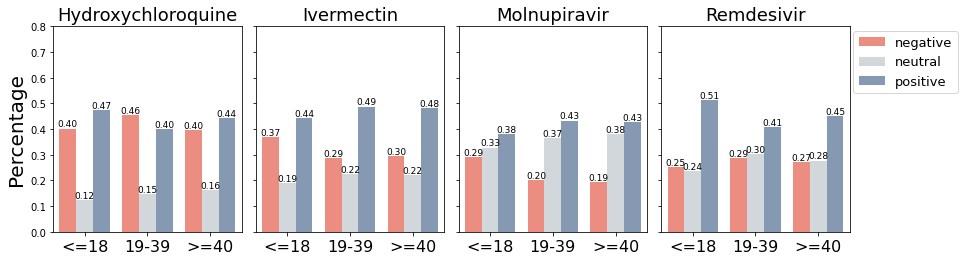

In [66]:
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1, 4)
fig.set_figheight(4)
fig.set_figwidth(12)

# fig.suptitle('Stance distribution conditioned on predicted age', fontsize=17)

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)


for drug_name, ax_tmp in zip(["hcq", 'ivermectin', "molnupiravir", "remdesivir"], [ax1, ax2, ax3, ax4]):
    a_tmp = df_tmp[df_tmp.drug_name == drug_name]

    ax_tmp = sns.barplot(x="pred_age",
               y="screen_name",
               hue="stance",
               palette=colors,
               # palette=sns.color_palette('pastel', n_colors=4),
               data=a_tmp, ax=ax_tmp)
    # change_width(ax_tmp, .25)
    ax_tmp.set_label("Inferred Age")
    ax_tmp.set_ylabel("Percentage", size=20)
    # ax_tmp.set_title(drug_name, size=15)
    ax_tmp.set_xticklabels(["<=18", "19-39", ">=40"], size=16)
    ax_tmp.set_xlabel(" ", size=15)
    ax_tmp.set_title(drug2realname[drug_name], size=18)
    for idx, i in enumerate(ax_tmp.containers):
        # if idx == 1:
        #     continue
        ax_tmp.bar_label(i, fmt='%.2f', fontsize=9)
    ax_tmp.get_legend().remove()
    ax_tmp.set_ylim(0, 0.8)

lines = []
labels = []

for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)
    break
    
fig.legend(lines, ["negative", "neutral", "positive"],     
           bbox_to_anchor=(1.12, 0.9),
           loc = 'upper right', prop={'size': 13})

for ax in fig.get_axes():
    ax.label_outer()

fig.tight_layout()

# attribute_name = 'pred_gender'
# drug_name = 'ivermectin'
# plot_dist(df_tweets_users, attribute_name, drug_name)


# attribute_name = 'pred_gender'
# drug_name = 'hcq'
# plot_dist(df_tweets_users, attribute_name, drug_name)


# attribute_name = 'pred_gender'
# drug_name = 'molnupiravir'
# plot_dist(df_tweets_users, attribute_name, drug_name)


# attribute_name = 'pred_gender'
# drug_name = 'remdesivir'
# plot_dist(df_tweets_users, attribute_name, drug_name)


## political orientation

In [92]:
attribute_name = "political_orientation"


# a_count = df_tweets_users.groupby(["drug_name", "stance", attribute_name])[['screen_name']].count()
# a_sum = a_count.reset_index().groupby(["drug_name", "stance"]).sum()
# df_tmp = (a_count / a_sum).reset_index()
# df_tmp.head()


a_count = df_tweets_users.groupby(["drug_name", "political_orientation", "stance"])[['screen_name']].count()

a_sum = a_count.reset_index()
a_sum.stance = a_sum.stance.astype("str")
a_sum = a_sum.groupby(["drug_name", "political_orientation"]).sum()

df_tmp = (a_count / a_sum).reset_index()

In [93]:
a_count.reset_index().to_csv("partisan_stance_plot.csv")

In [94]:
df_tmp

,drug_name,political_orientation,stance,screen_name
0,hcq,left,-1,0.684236
1,hcq,left,0,0.157962
2,hcq,left,1,0.157802
3,hcq,neutral,-1,0.401824
4,hcq,neutral,0,0.239798
5,hcq,neutral,1,0.358377
6,hcq,right,-1,0.165535
7,hcq,right,0,0.127565
8,hcq,right,1,0.706900
9,ivermectin,left,-1,0.455885


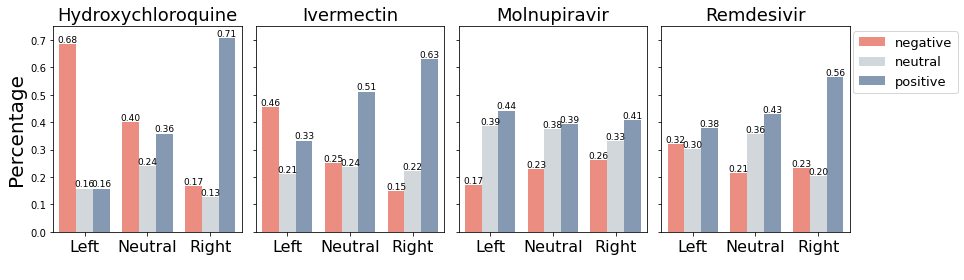

In [95]:
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1, 4)
fig.set_figheight(4)
fig.set_figwidth(12)

# fig.suptitle('Stance distribution on predicted political partisanship', fontsize=17)

for drug_name, ax_tmp in zip(["hcq", 'ivermectin', "molnupiravir", "remdesivir"], [ax1, ax2, ax3, ax4]):
    a_tmp = df_tmp[df_tmp.drug_name == drug_name]

    ax_tmp = sns.barplot(x=attribute_name,
               y="screen_name",
               hue="stance",
               palette=colors,     
               # palette=sns.color_palette('pastel', n_colors=3),
               data=a_tmp, ax=ax_tmp)
    ax_tmp.set_label("Inferred Political Orientation")
    ax_tmp.set_ylabel("Percentage", size=20)
    # ax_tmp.set_title(drug_name, size=15)
    ax_tmp.set_xticklabels(["Left", "Neutral", "Right"], size=16)
    ax_tmp.set_xlabel(" ", size=15)
    for idx, i in enumerate(ax_tmp.containers):
        # if idx != 1:
        ax_tmp.bar_label(i, fmt='%.2f', fontsize=9)
    # ax_tmp.bar_label(ax_tmp.containers[0], fmt='%.2f')
    ax_tmp.get_legend().remove()
    ax_tmp.set_title(drug2realname[drug_name], size=18)
    ax_tmp.set_ylim(0, 0.75)

lines = []
labels = []

for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)
    break
    
fig.legend(lines, ["negative", "neutral", "positive"],     
           bbox_to_anchor=(1.12, 0.9),
           loc = 'upper right', prop={'size': 13})

for ax in fig.get_axes():
    ax.label_outer()

fig.tight_layout()

## Med

In [96]:
attribute_name = "med"

a_count = df_tweets_users.groupby(["drug_name", "med", "stance"])[['screen_name']].count()

a_sum = a_count.reset_index()
a_sum.stance = a_sum.stance.astype("str")
a_sum = a_sum.groupby(["drug_name", "med"]).sum()

df_tmp = (a_count / a_sum).reset_index()

In [99]:
a_count.reset_index().to_csv("med_stance_plot.csv")
df_tmp

,drug_name,med,stance,screen_name
0,hcq,Med,-1,0.481993
1,hcq,Med,0,0.171692
2,hcq,Med,1,0.346315
3,hcq,Non-med,-1,0.405147
4,hcq,Non-med,0,0.154091
5,hcq,Non-med,1,0.440762
6,ivermectin,Med,-1,0.357176
7,ivermectin,Med,0,0.282880
8,ivermectin,Med,1,0.359945
9,ivermectin,Non-med,-1,0.292468


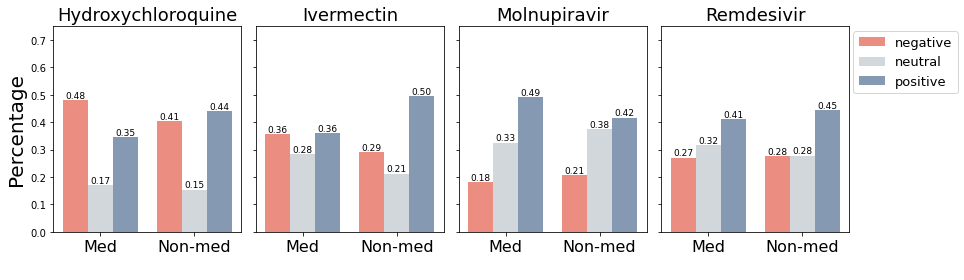

In [98]:
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1, 4)
fig.set_figheight(4)
fig.set_figwidth(12)

# fig.suptitle('Stance distribution on predicted medical background', fontsize=17)

for drug_name, ax_tmp in zip(["hcq", 'ivermectin', "molnupiravir", "remdesivir"], [ax1, ax2, ax3, ax4]):
    a_tmp = df_tmp[df_tmp.drug_name == drug_name]

    ax_tmp = sns.barplot(x=attribute_name,
               y="screen_name",
               hue="stance",
               palette=colors,
               # palette=sns.color_palette('pastel', n_colors=3),
               data=a_tmp, ax=ax_tmp)
    # ax_tmp.set_label("Inferred Political Orientation")
    ax_tmp.set_ylabel("Percentage", size=20)
    # ax_tmp.set_title(drug_name, size=20)
    ax_tmp.set_xticklabels(["Med", "Non-med"], size=16)
    ax_tmp.set_xlabel(" ", size=15)
    for idx, i in enumerate(ax_tmp.containers):
        # if idx != 1:
        ax_tmp.bar_label(i, fmt='%.2f', fontsize=9)
    # ax_tmp.bar_label(ax_tmp.containers[0], fmt='%.2f')
    ax_tmp.get_legend().remove()
    ax_tmp.set_title(drug2realname[drug_name], size=18)
    ax_tmp.set_ylim(0, 0.75)

lines = []
labels = []

for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)
    break
    
fig.legend(lines, ["negative", "neutral", "positive"],     
           bbox_to_anchor=(1.12, 0.9),
           loc = 'upper right', prop={'size': 13})

for ax in fig.get_axes():
    ax.label_outer()

fig.tight_layout()

## overall stance

In [47]:
a_count = df_tweets_users.groupby(["drug_name", "stance"])[['screen_name']].count()

a_sum = a_count.reset_index()
a_sum.stance = a_sum.stance.astype("str")
a_sum = a_sum.groupby(["drug_name"]).sum()

df_tmp = (a_count / a_sum).reset_index()
df_tmp

,drug_name,stance,screen_name
0,hcq,-1,0.411198
1,hcq,0,0.155477
2,hcq,1,0.433325
3,ivermectin,-1,0.298955
4,ivermectin,0,0.219341
5,ivermectin,1,0.481704
6,molnupiravir,-1,0.204169
7,molnupiravir,0,0.371502
8,molnupiravir,1,0.424329
9,remdesivir,-1,0.275646


In [49]:
a_count.reset_index().to_csv("overall_stance_plot.csv")